# [9660] Gaussian Mixture Models 2
Data file:
* seaborn : tips
  * tip (dollars)
  * total_bill (dollars)
  * sex (of the bill payer)
  * smoker (whether there were smokers in the party)
  * day (of the week)
  * time (of day)
  * size (of the party)

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/17/24 21:36:54


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Load data

In [3]:
df = sns.load_dataset('tips')
df.shape

(244, 7)

### Examine data

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


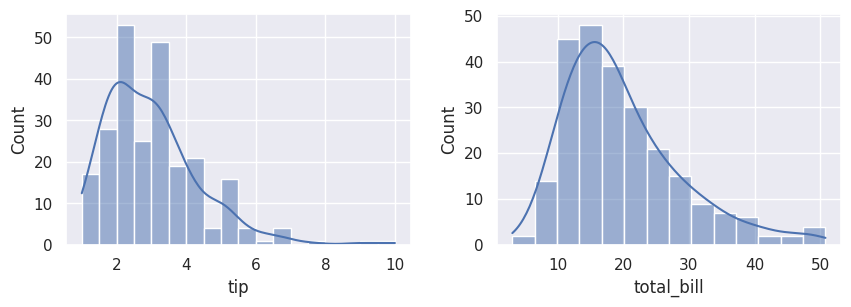

In [5]:
sns.set(style="darkgrid")

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

# Add some space between the plots
plt.subplots_adjust(wspace=0.25)

# Plot histogram for tip
sns.histplot(df['tip'], ax=ax[0], kde=True)

# Plot histogram for total_bill
sns.histplot(df['total_bill'], ax=ax[1], kde=True)

plt.show()

### Prepare data

In [6]:
X = df[['total_bill', 'tip']].copy()
X.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


### Train K-Means model

In [7]:
# Instantiate KMeans model
#  n_init = # of times KMeans is run with different centroid seeds
#  Setting n_init to stop warning message
KM = KMeans(n_clusters=2, max_iter=600, n_init=10, random_state=42)
KM.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 600,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [8]:
# Fit KMeans model
KM.fit(X)

KMeans(max_iter=600, n_clusters=2, n_init=10, random_state=42)

In [9]:
# Generate predictions for KM
KM_predictions = KM.predict(X)

### Train Gaussian Mixture model

In [10]:
# Instantiate Gaussian Mixture model
GMM_1 = GaussianMixture(n_components=2, covariance_type='full')
GMM_1.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [11]:
# Fit Gaussian Mixture model
GMM_1.fit(X)

GaussianMixture(n_components=2)

In [12]:
# Generate predictions for GMM
GMM_1_predictions = GMM_1.predict(X)

### Visualize results

In [13]:
# Add predictions to the original dataset
df['KM_cluster'] = KM_predictions
df['GMM_1_cluster'] = GMM_1_predictions

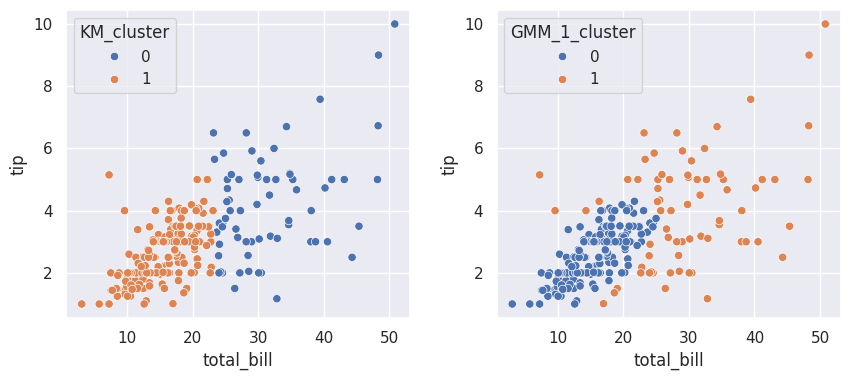

In [14]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# Add some space between the plots
plt.subplots_adjust(wspace=0.25)

# Plot the scatter plots on separate subplots
sns.scatterplot(data=df, y='tip', x='total_bill', hue='KM_cluster', ax=ax1)
sns.scatterplot(data=df, y='tip', x='total_bill', hue='GMM_1_cluster', ax=ax2)

plt.show()

K-Means is working as expected, with circular shaped division. There is cluster 0 with total_bill up to 23 dollars and tips up to 5.50 dollars, and cluster 1 with the rest of the data.  

Gaussian Mixture with ‘full’ covariance type gives us a tighter cluster 1, with very proportional tips against total bill, and a cluster 0 with more spread values. The clusters have different shapes.

#### Try other Gaussian Mixture model covariance_types

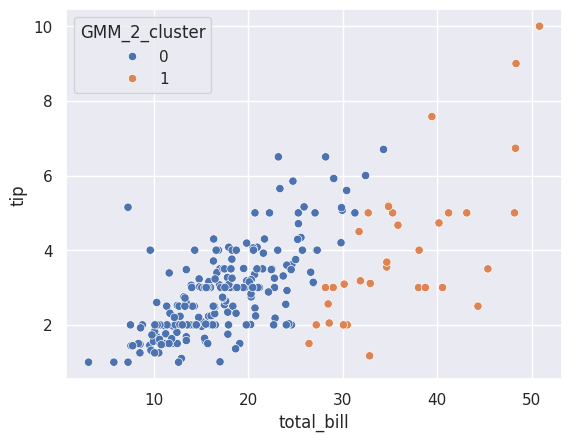

In [15]:
# Rerun the Gaussian Mixture model
#  covariance_type='tied' means the cluster should have the same shape
GMM_2 = GaussianMixture(n_components=2, covariance_type='tied')
GMM_2.fit(X)

# Generate predictions for GMM
GMM_2_predictions = GMM_2.predict(X)

# Add predictions to the original dataset
df['GMM_2_cluster'] = GMM_2_predictions

# Plot new GMM cluster
sns.scatterplot(data=df, y='tip', x='total_bill', hue='GMM_2_cluster');

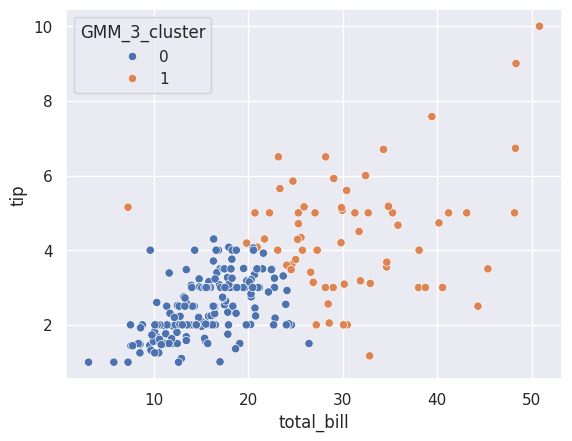

In [16]:
# Rerun the Gaussian Mixture model
#  covariance_type='diag' means the cluster should the shape follow the coordinate axes,
#   but some outliers can vary by component
GMM_3 = GaussianMixture(n_components=2, covariance_type='diag')
GMM_3.fit(X)

# Generate predictions for GMM
GMM_3_predictions = GMM_3.predict(X)

# Add predictions to the original dataset
df['GMM_3_cluster'] = GMM_3_predictions

# Plot new GMM cluster
sns.scatterplot(data=df, y='tip', x='total_bill', hue='GMM_3_cluster');

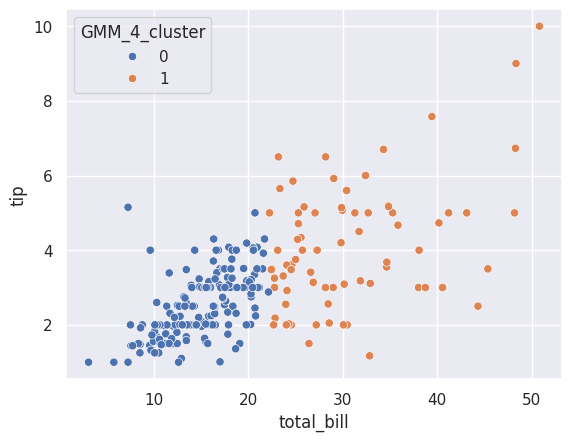

In [17]:
# Rerun the Gaussian Mixture model
#  covariance_type='spherical' means the cluster should have a spherical shape (similar to KMeans)
GMM_4 = GaussianMixture(n_components=2, covariance_type='spherical')
GMM_4.fit(X)

# Generate predictions for GMM
GMM_4_predictions = GMM_4.predict(X)

# Add predictions to the original dataset
df['GMM_4_cluster'] = GMM_4_predictions

# Plot new GMM cluster
sns.scatterplot(data=df, y='tip', x='total_bill', hue='GMM_4_cluster');